In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#read the filtered data set as a pandas data fram
data_set = pd.read_csv("Telecom_user dataset for interviews.csv")
#display data -fist two rows
data_set.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3517,0,0,1,0,52,0,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,35.45,1958.95,0
4463,0,0,0,0,13,1,1,Fiber optic,0,1,1,0,0,0,Month-to-month,1,Electronic check,84.45,1058.6,1


In [3]:
#display values in the totalcharges,MonthlyCharges and tenure
data_set.TotalCharges.values

array(['1734.65', '3973.2', '2869.85', ..., '306.05', '1200.15', '457.3'],
      dtype=object)

In [4]:
data_set.MonthlyCharges.values

array([24.1 , 88.15, 74.95, ..., 21.15, 99.45, 19.8 ])

In [5]:
data_set.tenure.values

array([72, 44, 38, ..., 12, 12, 26], dtype=int64)

In [6]:
#converting totalcharges to numeric since it is string
pd.to_numeric(data_set.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5981    False
5982    False
5983    False
5984    False
5985    False
Name: TotalCharges, Length: 5986, dtype: bool

In [7]:
#checks null rows for total charges
#coerce -ignore errors 
data_set[pd.to_numeric(data_set.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,1,0,0,1,0,1,1,DSL,1,1,0,1,0,0,Two year,1,Bank transfer (automatic),61.90,,0
634,0,0,1,1,0,0,0,DSL,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,,0
2771,1,0,1,1,0,1,1,0,0,0,0,0,0,0,Two year,0,Mailed check,25.35,,0
3086,1,0,1,1,0,1,0,0,0,0,0,0,0,0,One year,1,Mailed check,19.70,,0
3255,1,0,1,1,0,1,0,0,0,0,0,0,0,0,Two year,0,Mailed check,19.85,,0
4326,0,0,1,1,0,1,0,DSL,1,1,1,0,1,1,Two year,0,Mailed check,80.85,,0
5375,1,0,0,1,0,1,0,0,0,0,0,0,0,0,Two year,0,Mailed check,20.25,,0
5382,0,0,1,1,0,1,0,0,0,0,0,0,0,0,Two year,0,Mailed check,20.00,,0
5695,0,0,1,1,0,0,0,DSL,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,,0
5951,1,0,1,1,0,1,1,0,0,0,0,0,0,0,Two year,0,Mailed check,25.75,,0


In [8]:
data_set.shape

(5986, 20)

In [9]:
#drop row where total charges are null
data_set1 = data_set[data_set.TotalCharges!=' ']
data_set1.shape
#10 rows will be dropped



(5976, 20)

In [10]:
#converting TotalCharges to numeric after dropping null rows
data_set1.TotalCharges = pd.to_numeric(data_set1.TotalCharges)
data_set1.TotalCharges.dtypes

C:\Users\psrat\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('float64')

In [11]:
#one hot encoding is applied to categorical data
data_set2 = pd.get_dummies(data=data_set1,columns = ['InternetService','PaymentMethod','Contract'],drop_first=True)

In [12]:
#checking if all data types are numbers
data_set2.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_DSL                        uint8
InternetService_Fiber optic                uint8
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electr

In [13]:
#these columns were scaled so these values will be within 0 and 1 range
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_set2[cols_to_scale] = scaler.fit_transform(data_set2[cols_to_scale])

In [14]:
X = data_set2.drop('Churn',axis='columns')#input
y = data_set2['Churn']#target

#data set is made so that 20% is test data
#and 80% is the train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [15]:
#testshape
X_test.shape

(1196, 23)

In [16]:
#train shape
X_train.shape

(4780, 23)

In [17]:
len(X_train.columns)#number of columns of training

23

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import numpy

#model
model = Sequential()
model.add(Dropout(0.2, input_shape=(23,)))
model.add(Dense(23, input_shape=(23,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=150,batch_size=4, verbose=0,validation_data=(X_test,y_test),callbacks=[es], shuffle=True)


Epoch 00085: early stopping


In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [20]:
model.evaluate(X_test, y_test)

38/38 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8094


[0.41812580823898315, 0.8093645572662354]

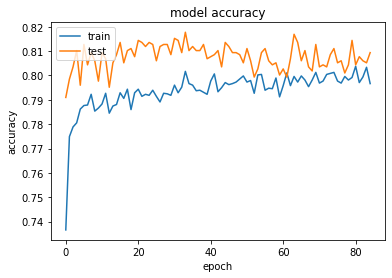

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


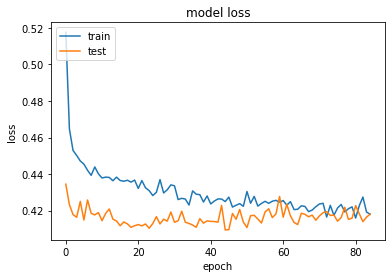

In [22]:
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()